In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
#GETTING FILE FUNCTION.
def readdata(filename):
    df=pd.read_csv(filename)
    return df.values

In [3]:
#GETTING TRAINING AND TEST SET.
x=readdata('F:\AI Mafia\Week 2 - Assignments (Linear and Logistic Regression)\Linear Regression\Assignment 1\Training Data\Linear_X_Train.csv')
y=readdata('F:\AI Mafia\Week 2 - Assignments (Linear and Logistic Regression)\Linear Regression\Assignment 1\Training Data\Linear_Y_Train.csv')
testdata=readdata('F:\AI Mafia\Week 2 - Assignments (Linear and Logistic Regression)\Linear Regression\Assignment 1\Testing Data\Linear_X_Test.csv')

In [4]:
print(x.shape,testdata.shape)
x=x.reshape((-1,1))
y=y.reshape((-1,1))
testdata=testdata.reshape((-1,1))
print(x,testdata.shape)

(3750, 1) (1250, 1)
[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]] (1250, 1)


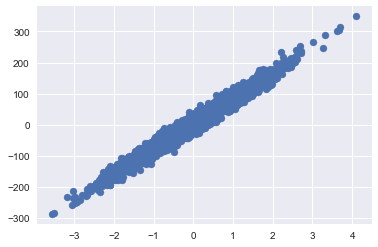

In [5]:
#Training set Plotting.
plt.scatter(x,y)
plt.show()

APPLYING LINEAR REGRESSION

In [6]:
def hypothesis(m,c,x):
    return m*x+c

In [7]:
def error(x,y,m,c):
    m=x.shape[0]
    te=0
    for i in range(m):
        te=(y[i]-hypothesis(m,c,x[i]))**2
    return 0.5*te

In [8]:
def gradient(x,y,m,c):
    grad=np.array([0.,0.])
    
    for i in range(x.shape[0]):
        grad[0]+=(hypothesis(m,c,x[i])-y[i])
        grad[1]+=(hypothesis(m,c,x[i]-y[i]))*x[i]
    return grad

In [9]:
def grad_descent(x,y,learn_rate,maxiter):
    m=0.0
    c=0.0
    err=[]
    for i in range(maxiter):
        
        grad=gradient(x,y,m,c)
        ce=error(x,y,m,c)
        m -=learn_rate*grad[1]
        c -=learn_rate*grad[0]
        err.append(ce)
    return m,c,err

In [10]:
m,c,err=grad_descent(testdata,y,learn_rate=0.000009,maxiter=1120)
print(m,c)

84.32149392070316 4.772239277054666


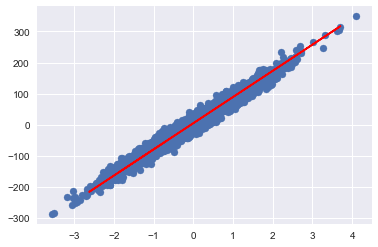

In [11]:
plt.scatter(x,y)
plt.plot(testdata,hypothesis(m,c,testdata),color='r')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model=LinearRegression()

In [14]:
print(model.fit(x,y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [15]:
output=model.predict(testdata)

In [16]:
bias=model.intercept_
coeff=model.coef_
print(bias)
print(coeff)

[3.72798828]
[[80.54363185]]


In [17]:
model.score(x,y)

0.9709612233822353

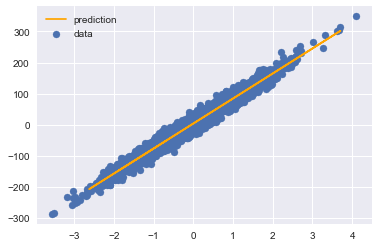

In [18]:
plt.scatter(x,y,label='data')
plt.plot(testdata,output,color='orange',label='prediction')
plt.legend()
plt.show()